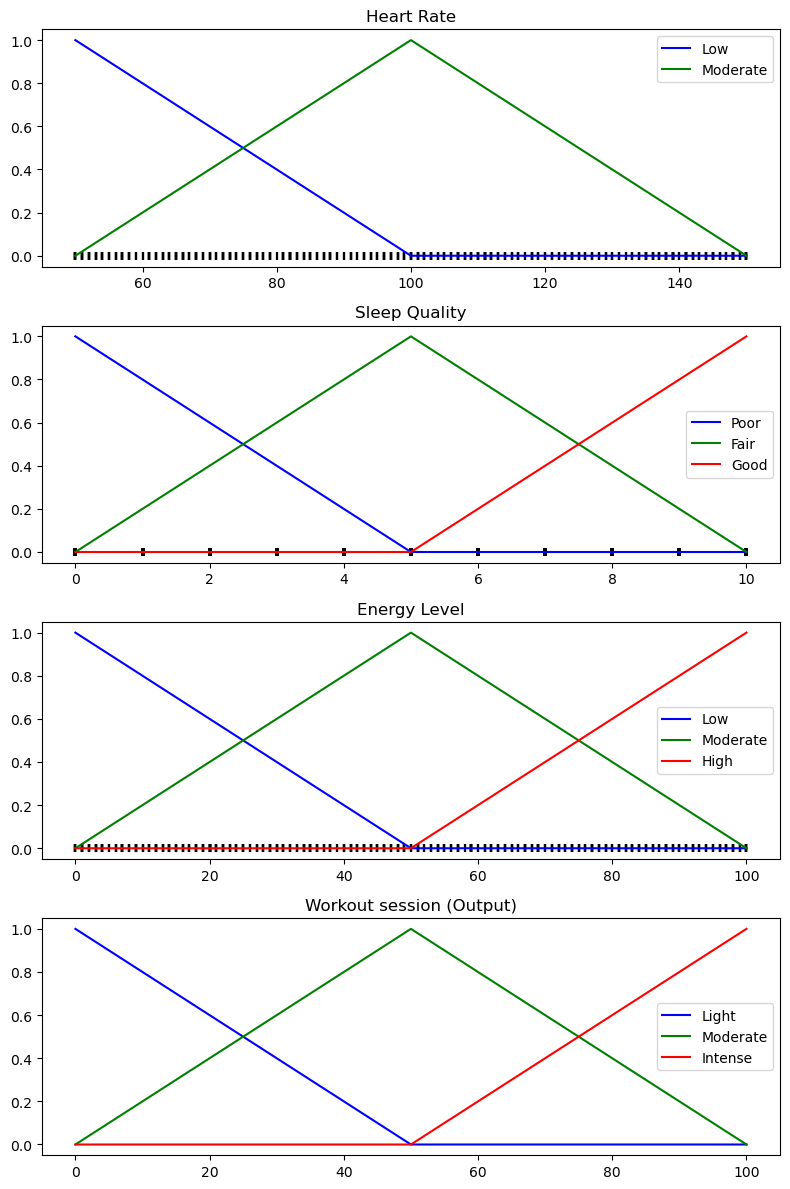

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate an imaginary dataset
np.random.seed(42)  # for reproducibility
num_samples = 1000
heart_rate_values = np.random.randint(50, 151, num_samples)
sleep_quality_values = np.random.randint(0, 11, num_samples)
energy_level_values = np.random.randint(0, 101, num_samples)

# Create a DataFrame
df = pd.DataFrame({
    'Heart_Rate': heart_rate_values,
    'Sleep_Quality': sleep_quality_values,
    'Energy_Level': energy_level_values
})

# Generate universe variables
heart_rate = np.arange(50, 151, 1)
sleep_quality = np.arange(0, 11, 1)
energy_level = np.arange(0, 101, 1)
workout_routine = np.arange(0, 101, 1)  # Adding the output variable

# Generate fuzzy membership functions
heart_rate_low = fuzz.trimf(heart_rate, [50, 50, 100])
heart_rate_moderate = fuzz.trimf(heart_rate, [50, 100, 150])

sleep_quality_poor = fuzz.trimf(sleep_quality, [0, 0, 5])
sleep_quality_fair = fuzz.trimf(sleep_quality, [0, 5, 10])
sleep_quality_good = fuzz.trimf(sleep_quality, [5, 10, 10])

energy_level_low = fuzz.trimf(energy_level, [0, 0, 50])
energy_level_moderate = fuzz.trimf(energy_level, [0, 50, 100])
energy_level_high = fuzz.trimf(energy_level, [50, 100, 100])

# Define fuzzy membership functions for the output variable (Workout Routine)
workout_routine_light = fuzz.trimf(workout_routine, [0, 0, 50])
workout_routine_moderate = fuzz.trimf(workout_routine, [0, 50, 100])
workout_routine_intense = fuzz.trimf(workout_routine, [50, 100, 100])

# Visualize the fuzzy membership functions and dataset
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 12))

# Plot fuzzy membership functions for inputs
ax0.plot(heart_rate, heart_rate_low, 'b', linewidth=1.5, label='Low')
ax0.plot(heart_rate, heart_rate_moderate, 'g', linewidth=1.5, label='Moderate')
ax0.set_title('Heart Rate')
ax0.legend()

ax1.plot(sleep_quality, sleep_quality_poor, 'b', linewidth=1.5, label='Poor')
ax1.plot(sleep_quality, sleep_quality_fair, 'g', linewidth=1.5, label='Fair')
ax1.plot(sleep_quality, sleep_quality_good, 'r', linewidth=1.5, label='Good')
ax1.set_title('Sleep Quality')
ax1.legend()

ax2.plot(energy_level, energy_level_low, 'b', linewidth=1.5, label='Low')
ax2.plot(energy_level, energy_level_moderate, 'g', linewidth=1.5, label='Moderate')
ax2.plot(energy_level, energy_level_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Energy Level')
ax2.legend()

# Plot fuzzy membership functions for output
ax3.plot(workout_routine, workout_routine_light, 'b', linewidth=1.5, label='Light')
ax3.plot(workout_routine, workout_routine_moderate, 'g', linewidth=1.5, label='Moderate')
ax3.plot(workout_routine, workout_routine_intense, 'r', linewidth=1.5, label='Intense')
ax3.set_title('Workout session (Output)')
ax3.legend()

# Mark input values on the plots
ax0.scatter(df['Heart_Rate'], np.zeros_like(df['Heart_Rate']), color='k', marker='|', label='Dataset Values')
ax1.scatter(df['Sleep_Quality'], np.zeros_like(df['Sleep_Quality']), color='k', marker='|', label='Dataset Values')
ax2.scatter(df['Energy_Level'], np.zeros_like(df['Energy_Level']), color='k', marker='|', label='Dataset Values')

# Display the plots

plt.tight_layout()
plt.show()


In [ ]:
# Function to make assumptions, plot membership functions, and display output
def make_assumption_and_plot(assumed_heart_rate, assumed_sleep_quality, assumed_energy_level):
    # Fuzzify the assumed input values
    heart_rate_membership_low = fuzz.interp_membership(heart_rate, heart_rate_low, assumed_heart_rate)
    heart_rate_membership_moderate = fuzz.interp_membership(heart_rate, heart_rate_moderate, assumed_heart_rate)

    sleep_quality_membership_poor = fuzz.interp_membership(sleep_quality, sleep_quality_poor, assumed_sleep_quality)
    sleep_quality_membership_fair = fuzz.interp_membership(sleep_quality, sleep_quality_fair, assumed_sleep_quality)
    sleep_quality_membership_good = fuzz.interp_membership(sleep_quality, sleep_quality_good, assumed_sleep_quality)

    energy_level_membership_low = fuzz.interp_membership(energy_level, energy_level_low, assumed_energy_level)
    energy_level_membership_moderate = fuzz.interp_membership(energy_level, energy_level_moderate, assumed_energy_level)
    energy_level_membership_high = fuzz.interp_membership(energy_level, energy_level_high, assumed_energy_level)

    # Apply fuzzy rules
    # Rule 1: If heart rate is low OR sleep quality is poor OR energy level is low, then workout is light
    rule1 = np.fmin(np.fmin(heart_rate_membership_low, sleep_quality_membership_poor),
                    energy_level_membership_low)
    workout_intensity_light = np.fmin(rule1, workout_routine_light)

    # Rule 2: If heart rate is moderate AND sleep quality is fair AND energy level is moderate, then workout is moderate
    rule2 = np.fmin(np.fmin(heart_rate_membership_moderate, sleep_quality_membership_fair),
                    energy_level_membership_moderate)
    workout_intensity_moderate = np.fmin(rule2, workout_routine_moderate)

    # Rule 3: If heart rate is high AND sleep quality is good AND energy level is high, then workout is intense
    rule3 = np.fmin(np.fmin(1 - heart_rate_membership_low, sleep_quality_membership_good),
                    energy_level_membership_high)
    workout_intensity_intense = np.fmin(rule3, workout_routine_intense)

    # Aggregate all output membership functions
    aggregated = np.fmax(workout_intensity_light, np.fmax(workout_intensity_moderate, workout_intensity_intense))

    # Defuzzify the result
    result = fuzz.defuzz(workout_routine, aggregated, 'centroid')

    # Print the workout routine output
    print(f"Your workout routine is: {result:.2f} (Defuzzified Result)")

    # Visualize the assumed input values and the corresponding output
# Example assumption and plot

make_assumption_and_plot(120, 1, 10)


Your workout routine is: 50.00 (Defuzzified Result)
